In [28]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

In [29]:
# THIS LOADS THE RIGHT DATA IN THE RIGHT SHAPE
simulation_mean_df = pd.read_json('RESULTS_Multimodal_Model.json')
simulation_mean_df = simulation_mean_df.iloc[0:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()



Number of rows: 20
Number of columns: 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.610633,0.613594,0.599157,0.602537,0.600775,0.628830,0.584226,0.601100,0.593271,0.619756,...,0.604907,0.578784,0.605230,0.582610,0.635648,0.597614,0.593014,0.606930,0.584230,0.621302
1,0.518138,0.513128,0.520463,0.534321,0.522573,0.513633,0.515557,0.520327,0.513790,0.506164,...,0.525751,0.510156,0.509284,0.514973,0.533596,0.499039,0.533890,0.498326,0.503942,0.500719
2,0.512625,0.509880,0.496243,0.509140,0.494747,0.498736,0.498916,0.500977,0.496613,0.485550,...,0.491808,0.484281,0.484064,0.485134,0.499729,0.478309,0.503667,0.480501,0.519780,0.485111
3,0.511181,0.504003,0.478632,0.478008,0.485629,0.486916,0.506795,0.493441,0.490001,0.478956,...,0.483931,0.473521,0.492860,0.474418,0.493459,0.493141,0.488192,0.498927,0.506152,0.479659
4,0.508570,0.500735,0.475797,0.475486,0.488940,0.484470,0.504078,0.473812,0.487948,0.484809,...,0.480083,0.469024,0.490476,0.496685,0.490717,0.490064,0.485707,0.498005,0.508890,0.484922


In [30]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(simulation_mean_df, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
 # this switches the x-axis labels to strat from 1 instead of 0

print(df_melted)

print(df_melted.index)



    variable  Average Waiting Time
0          0              0.610633
1          0              0.518138
2          0              0.512625
3          0              0.511181
4          0              0.508570
..       ...                   ...
15        99              0.484717
16        99              0.467743
17        99              0.467743
18        99              0.467743
19        99              0.488574

[2000 rows x 2 columns]
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype='int64', length=2000)


In [31]:
df_melted.index = df_melted.index + 1
# to switch the start on the axis to 1 instead of zero, only run ONCE

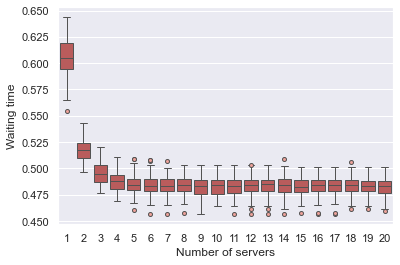

0.605351521459
0.517088747284
0.4954605813639999
0.48821889611599995
0.48454748698000005
0.48385442162199993
0.4835336233860001
0.483814748421
0.48272696751200006
0.483173294481
0.48238663043100005
0.483456615003
0.48400217638299997
0.4836355251890001
0.48224973366100005
0.48263454204000006
0.48295769048399995
0.48335977018099996
0.48265394324000005
0.48262239737199997


In [32]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


#xticks_interval = 4
#labels = ax.get_xticks()[::xticks_interval] 
#ax.set_xticks(labels)

#plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")

plt.show()

for row in simulation_mean_df.index:
    print(np.mean(simulation_mean_df.iloc[row]))

<Figure size 720x504 with 0 Axes>

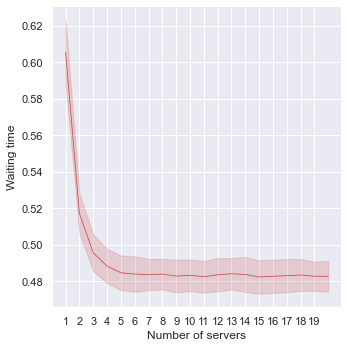

In [33]:
plt.figure(figsize=(10, 7))
sns.relplot(x=df_melted.index, y="Average Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c", linewidth=0.8) #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

#plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

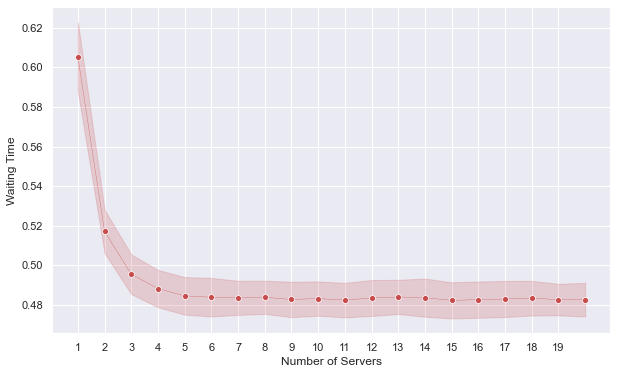

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd", linewidth=0.3, color="#c94c4c")
#plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

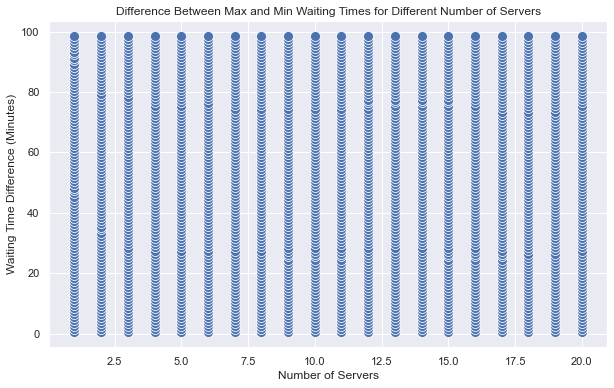

In [35]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()